In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [4]:
x=df.iloc[:,3:]

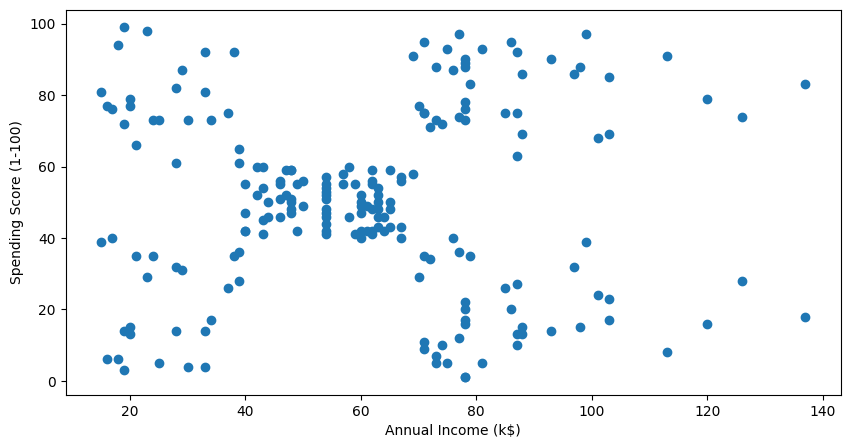

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [21]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=5)
clusters=dbscan.fit_predict(x_scaled)

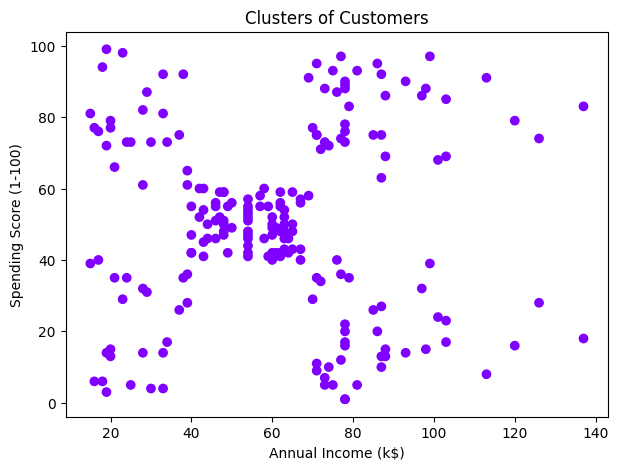

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=clusters,cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score
eps_values=[0.2,0.3,0.5]
for eps in eps_values:
  print(f"\n Evaluating DBSCAN using eps={eps}")
  dbscan=DBSCAN(eps=eps,min_samples=5)
  labels=dbscan.fit_predict(x_scaled)
  unique_labels=set(labels)
  n_clusters=len(unique_labels)-(1 if -1 in unique_labels else 0)
  n_noise=list(labels).count(-1)
  noise_ratio=n_noise/len(labels)
  print(f"Number of Clusters: {n_clusters}")
  print(f"Number of Noise Points: ",round(noise_ratio,2))
  if n_clusters>1:
    x_non_noise=x_scaled[labels!=-1]
    labels_non_noise=labels[labels!=-1]
    silhouette_avg=silhouette_score(x_non_noise,labels_non_noise)
    print(f"Silhouette Score: {silhouette_avg}")


 Evaluating DBSCAN using eps=0.2
Number of Clusters: 7
Number of Noise Points:  0.39
Silhouette Score: 0.5856126991466908

 Evaluating DBSCAN using eps=0.3
Number of Clusters: 7
Number of Noise Points:  0.17
Silhouette Score: 0.5243276105881419

 Evaluating DBSCAN using eps=0.5
Number of Clusters: 2
Number of Noise Points:  0.04
Silhouette Score: 0.3875583892728279
